# LE49 Exercise 3: Document Models

*Xiangyu Zhao*\
*Trinity College*\
*CRSid: xz398*

## Answer to Question (a)

In a simple categorical model

![](Question(a)/simple_categorical_model.png)

where
* $D$ is the number of documents
* $|V|$ is the size of the vocabulary $V$, i.e. the number of unique words
* $N$ is the total number of words in the collection
* $N_d$ is the number of words in document $d$
* $\boldsymbol{w}_d=\begin{bmatrix}w_{1d} & \cdots & w_{N_d d}\end{bmatrix}^T$ is the document $d$, where $w_{nd}\sim\text{Cat}(\boldsymbol{\beta})$ is the $n$-th word in document $d$, each drwawn from a discrete categorical distribution with parameters $\boldsymbol{\beta}$
* $c_v$ is the total count of word $v$ in the collection

the (log) likelihood of the dataset is 

$$\Pr(\boldsymbol{w}|\boldsymbol{\beta})=\prod_{d=1}^D\prod_{n=1}^{N_d}\beta_{w_{nd}}=\prod_{v=1}^{|V|} \beta_v^{c_v}\implies\log\Pr(\boldsymbol{w}|\boldsymbol{\beta})=\sum_{v=1}^{|V|} c_v\log\beta_v$$

and the maximum likelihood estimator $\hat{\boldsymbol{\beta}}$ is

$$\hat{\beta_v}=\frac{c_v}{N}=\frac{c_v}{\sum_{i=1}^{|V|} c_{i}}$$

The histogram of the 20 most probable words is shown below:

![](Question(a)/histogram.png)

The maximum likelihood estimator $\hat{\boldsymbol{\beta}}$ can be used to find the (log) likelihood of a test document. However, since the test document `doc_id=2527` contains a word not in the training set (`5479, 'schwarz'`), the corresponding $\hat{\beta}_{5479}$ for such word is zero, resulting in the likelihood of the test document `doc_id=2527` becoming zero, and consequently its log likelihood becoming negative infinity.

The simple categorical model asserts that any word it does not see in the training set to be improbable, and therefore any document containing words not in the training set becomes improbable too. One way to fix this is to inflate the word counts with a pseudo-count, and then renormalise the likelihood. By doing so, the words not observed in the training set can have some probability rather than zero.

## Answer to Question (b)

For Bayesian inference: using a symmetric Dirichlet distribution with concentration parameter $\alpha=0.1$ as prior

$$\begin{aligned}
\boldsymbol{\alpha} &= \begin{bmatrix}\alpha & \cdots & \alpha\end{bmatrix}^T\\
\implies p(\boldsymbol{\beta}) &= \text{Dir}(\boldsymbol{\beta}|\boldsymbol{\alpha}) = \frac{1}{\mathrm{B}(\boldsymbol{\alpha})}\prod_{v=1}^{|V|}\beta_v^{\alpha-1} \\
    &= \frac{\Gamma\left(\sum_{v=1}^{|V|}\alpha\right)}{\prod_{v=1}^{|V|}\Gamma(\alpha)}\prod_{v=1}^{|V|}\beta_v^{\alpha-1} \\
    &= \frac{\Gamma(|V|\alpha)}{\left(\Gamma(\alpha)\right)^{|V|}}\prod_{v=1}^{|V|}\beta_v^{\alpha-1}
\end{aligned}$$

the posterior is therefore

$$\begin{aligned}
p(\boldsymbol{\beta}|\boldsymbol{w}) &\propto \Pr(\boldsymbol{w}|\boldsymbol{\beta})p(\boldsymbol{\beta}) \\
    &\propto \prod_{v=1}^{|V|}\beta_v^{c_v}\prod_{v=1}^{|V|}\beta_v^{\alpha-1} \\
    &= \prod_{v=1}^{|V|}\beta_v^{c_v+\alpha-1} \\
    &\propto \text{Dir}(\boldsymbol{\beta}|c_1+\alpha,\cdots,c_{|V|}+\alpha)
\end{aligned}$$

which is another Dirichlet distribution, which means that the Dirichlet distribution is the conjugate prior of the categorical/multinomial likelihood. Therefore, the posterior predictive distribution is 

$$\begin{aligned}
\tilde{\beta}_v=\Pr(v|\boldsymbol{w}) &= \int_\boldsymbol{\beta}\Pr(v|\boldsymbol{\beta})p(\boldsymbol{\beta}|\boldsymbol{w})d\boldsymbol{\beta} \\
    &= \int_\boldsymbol{\beta}\beta_v p(\boldsymbol{\beta}|\boldsymbol{w})d\boldsymbol{\beta} \\
    &= \mathbb{E}[\boldsymbol{\beta}|\boldsymbol{w}] = \mathbb{E}\left[\boldsymbol{\beta}|c_1,\cdots,c_{|V|}\right] \\
    &= \frac{\alpha+c_v}{|V|\alpha+\sum_{i=1}^{|V|}c_i}=\frac{\alpha+c_v}{|V|\alpha+N}
\end{aligned}$$

which, compared to $\hat{\beta}_v$, is just adding a pseudo-count $\alpha$ to every word in the vocabulary. Adding a pseudo-count increases the probabilities of the rare words, but decreases those of the common words. The turning threshold of such implication is $\frac{N}{|V|}$, i.e. the probability of a word $v$ with word count $c_v$ is increased if $c_v<\frac{N}{|V|}$, and is decreased if $c_v>\frac{N}{|V|}$.

## Answer to Question (c)

As is derived in (a), the log likelihood of a document is

$$\log\Pr(\boldsymbol{w}|\tilde{\boldsymbol{\beta}})=\sum_{v=1}^{|V|} c_v\log\tilde{\beta}_v$$

and the per-word log likelihood of a document is

$$\frac{1}{N_d}\log\Pr(\boldsymbol{w}|\tilde{\boldsymbol{\beta}})=\frac{1}{N_d}\sum_{v=1}^{|V|} c_v\log\tilde{\beta}_v$$

Therefore the per-word log likelihood of the test document `doc_id=2000` is -15.9104. The distribution of per-word log likelihood pver all the test documents is shown in the following histogram:

![](Question(c)/histogram.png)

The per-word perplexity of a document can be calculated as follows:

$$\begin{aligned}
\text{Per-word perplexity} &= \Pr(\boldsymbol{w}|\tilde{\boldsymbol{\beta}})^{-\frac{1}{N_d}}=\exp\left(-\frac{1}{N_d}\log\Pr(\boldsymbol{w}|\tilde{\boldsymbol{\beta}})\right)\\
    &= \exp\left(-(\text{Per-word log likelihood})\right)
\end{aligned}$$

which means the lower the per-word log likelihood of a document, the higher the per-word perplexity of it. Per-word perplexity can be interpreted as the average uncertainty associated with each observation of a document. Therefore, if a document consists of more common words, its per-word perplexity would be low, and if a document consists of more rare words, its per-word perplexity would be high. I have picked the test document with highest per-word perplexity (`doc_id=2245`) and the one with lowest per-word perplexity (`doc_id=2052`) and shown their contents. The distributions of common words and rare words in those two documents coincide with my claim. Please refer to the Appendix for the code and document contents.

## Answer to Question (d)

## Answer to Question (e)

## Answer to Question (f)

## Appendix: Full Source Code

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import pandas
import requests, io
import IPython

In [2]:
# Data import
r = requests.get('https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/kos_doc_data.mat')
with io.BytesIO(r.content) as f:
    data = scipy.io.loadmat(f)
    V = np.array([i[0] for i in data['V'].squeeze()])
    A,B = [pandas.DataFrame({'doc_id': M[:,0]-1, 'word_id': M[:,1]-1, 'count': M[:,2]}, 
                            columns=['doc_id','word_id','count']) 
           for M in (data['A'],data['B'])]

In [3]:
# Question (a)
words = A[['word_id', 'count']].groupby(['word_id']).sum()
Σc = np.sum(words['count'])
words['βhat'] = words['count'] / Σc
words.reset_index(inplace=True)

words

,word_id,count,βhat
0,0,4,0.000015
1,1,17,0.000063
2,2,13,0.000048
3,3,8,0.000029
4,4,10,0.000037
...,...,...,...
6887,6901,8,0.000029
6888,6902,224,0.000824
6889,6903,17,0.000063
6890,6904,32,0.000118


In [4]:
top20 = words.sort_values(by='βhat', ascending=False)[:20]

top20

,word_id,count,βhat
836,840,3833,0.014097
3412,3419,2631,0.009676
4186,4195,2287,0.008411
4622,4631,1550,0.005701
2997,3004,1457,0.005359
1657,1663,1453,0.005344
2633,2639,1356,0.004987
6674,6688,1352,0.004972
3274,3281,1274,0.004686
5540,5551,1225,0.004505


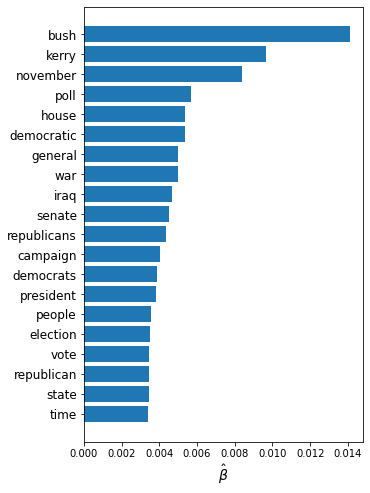

In [5]:
fig, ax = plt.subplots(figsize=(5,8))
ax.barh(np.arange(20), top20['βhat'], align='center')
ax.set_yticks(np.arange(20))
ax.set_yticklabels(V[top20['word_id']], fontsize=12)
ax.set_xlabel(r'$\hat{\beta}$', fontsize=14)
ax.invert_yaxis()
plt.savefig('Question(a)/histogram.png', bbox_inches='tight')
plt.show()

In [6]:
doc2527 = B[B['doc_id'] == 2527]

doc2527

,doc_id,word_id,count
54767,2527,107,1
54768,2527,158,1
54769,2527,159,1
54770,2527,236,2
54771,2527,241,1
...,...,...,...
54891,2527,6766,1
54892,2527,6819,1
54893,2527,6821,2
54894,2527,6866,1


In [7]:
doc2527_loglik = doc2527.join(words.set_index('word_id')['βhat'], on='word_id')
doc2527_loglik['βhat'].fillna(0, inplace=True)

doc2527_loglik

,doc_id,word_id,count,βhat
54767,2527,107,1,0.000371
54768,2527,158,1,0.000096
54769,2527,159,1,0.000033
54770,2527,236,2,0.001129
54771,2527,241,1,0.000066
...,...,...,...,...
54891,2527,6766,1,0.001710
54892,2527,6819,1,0.000166
54893,2527,6821,2,0.000658
54894,2527,6866,1,0.000743


In [8]:
loglik = np.sum(doc2527_loglik['count'] * np.log(doc2527_loglik['βhat']))

loglik

C:\Users\Victor\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf

In [9]:
list(zip(doc2527_loglik[doc2527_loglik['βhat'] == 0]['word_id'], V[doc2527_loglik[doc2527_loglik['βhat'] == 0]['word_id']]))

[(5479, 'schwarz')]

In [10]:
# Question (b)
α = 0.1
words['βtilde'] = (words['count'] + α) / (Σc + len(words) * α)

words

,word_id,count,βhat,βtilde
0,0,4,0.000015,0.000015
1,1,17,0.000063,0.000063
2,2,13,0.000048,0.000048
3,3,8,0.000029,0.000030
4,4,10,0.000037,0.000037
...,...,...,...,...
6887,6901,8,0.000029,0.000030
6888,6902,224,0.000824,0.000822
6889,6903,17,0.000063,0.000063
6890,6904,32,0.000118,0.000118


In [11]:
VA = len(words)
wordsA = words['word_id'].values

for v in range(len(V)):
    if v not in wordsA:
        words = words.append({'word_id': v, 'count': 0, 'βhat': 0, 'βtilde': α / (Σc + VA * α)},
                             ignore_index=True)

words['word_id'] = words['word_id'].astype(int)
words['count'] = words['count'].astype(int)
words.sort_values(by='word_id', inplace=True)
words.reset_index(drop=True, inplace=True)

words

,word_id,count,βhat,βtilde
0,0,4,0.000015,0.000015
1,1,17,0.000063,0.000063
2,2,13,0.000048,0.000048
3,3,8,0.000029,0.000030
4,4,10,0.000037,0.000037
...,...,...,...,...
6901,6901,8,0.000029,0.000030
6902,6902,224,0.000824,0.000822
6903,6903,17,0.000063,0.000063
6904,6904,32,0.000118,0.000118


In [12]:
words_sorted = words.sort_values(by='count', ascending=False)
words_sorted.reset_index(drop=True, inplace=True)

words_sorted

,word_id,count,βhat,βtilde
0,840,3833,0.014097,1.406192e-02
1,3419,2631,0.009676,9.652324e-03
2,4195,2287,0.008411,8.390343e-03
3,4631,1550,0.005701,5.686621e-03
4,3004,1457,0.005359,5.345445e-03
...,...,...,...,...
6901,3841,0,0.000000,3.668551e-07
6902,248,0,0.000000,3.668551e-07
6903,233,0,0.000000,3.668551e-07
6904,5838,0,0.000000,3.668551e-07


In [13]:
words_sorted[words_sorted['count'] >= Σc / VA]

,word_id,count,βhat,βtilde
0,840,3833,0.014097,0.014062
1,3419,2631,0.009676,0.009652
2,4195,2287,0.008411,0.008390
3,4631,1550,0.005701,0.005687
4,3004,1457,0.005359,0.005345
...,...,...,...,...
1492,1238,40,0.000147,0.000147
1493,1674,40,0.000147,0.000147
1494,2925,40,0.000147,0.000147
1495,3443,40,0.000147,0.000147


In [14]:
words_sorted[words_sorted['count'] <= Σc / VA]

,word_id,count,βhat,βtilde
1497,5009,39,0.000143,1.434403e-04
1498,6289,39,0.000143,1.434403e-04
1499,4534,39,0.000143,1.434403e-04
1500,603,39,0.000143,1.434403e-04
1501,2886,39,0.000143,1.434403e-04
...,...,...,...,...
6901,3841,0,0.000000,3.668551e-07
6902,248,0,0.000000,3.668551e-07
6903,233,0,0.000000,3.668551e-07
6904,5838,0,0.000000,3.668551e-07


In [15]:
# Question (c)
doc2000 = B[B['doc_id'] == 2000]

doc2000

,doc_id,word_id,count
0,2000,68,3
1,2000,74,1
2,2000,75,1
3,2000,76,1
4,2000,88,1
...,...,...,...
227,2000,6835,8
228,2000,6879,2
229,2000,6880,3
230,2000,6886,1


In [16]:
doc2000_loglik = doc2000.join(words.set_index('word_id')['βtilde'], on='word_id')

doc2000_loglik

,doc_id,word_id,count,βtilde
0,2000,68,3,0.000136
1,2000,74,1,0.000353
2,2000,75,1,0.000397
3,2000,76,1,0.000132
4,2000,88,1,0.002976
...,...,...,...,...
227,2000,6835,8,0.000371
228,2000,6879,2,0.001501
229,2000,6880,3,0.001919
230,2000,6886,1,0.000650


In [17]:
loglik_perword = np.mean(doc2000_loglik['count'] * np.log(doc2000_loglik['βtilde']))

loglik_perword

-15.910407454244634

In [18]:
B_β = B.join(words.set_index('word_id')['βtilde'], on='word_id')

B_β

,doc_id,word_id,count,βtilde
0,2000,68,3,0.000136
1,2000,74,1,0.000353
2,2000,75,1,0.000397
3,2000,76,1,0.000132
4,2000,88,1,0.002976
...,...,...,...,...
147944,3429,6251,1,0.000763
147945,3429,6662,2,0.000807
147946,3429,6737,1,0.000202
147947,3429,6759,1,0.000686


In [19]:
B_loglik_perword = []

for doc in B['doc_id'].unique():
    loglik_perword = np.mean(B_β[B_β['doc_id'] == doc]['count'] * np.log(B_β[B_β['doc_id'] == doc]['βtilde']))
    B_loglik_perword.append(loglik_perword)

B_loglik_perword = pandas.DataFrame(data={
    'doc_id': B['doc_id'].unique(), 
    'loglik_perword': B_loglik_perword
})

B_loglik_perword

,doc_id,loglik_perword
0,2000,-15.910407
1,2001,-8.919091
2,2002,-9.523430
3,2003,-8.868402
4,2004,-10.874548
...,...,...
1425,3425,-11.370327
1426,3426,-8.503939
1427,3427,-11.248844
1428,3428,-10.498302


In [20]:
B_loglik_perword.sort_values(by='loglik_perword', ascending=False, inplace=True)
B_loglik_perword.reset_index(drop=True, inplace=True)

B_loglik_perword

,doc_id,loglik_perword
0,2052,-7.526586
1,2025,-7.602709
2,2008,-7.603124
3,2076,-7.604641
4,2359,-7.647256
...,...,...
1425,2233,-15.787465
1426,2000,-15.910407
1427,3216,-16.040684
1428,2859,-16.057881


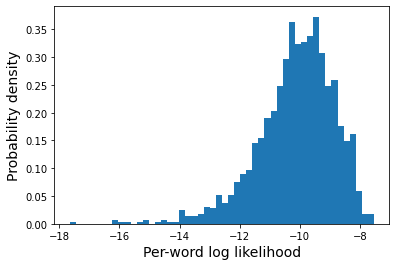

In [21]:
plt.hist(B_loglik_perword['loglik_perword'], bins=50, density=True)
plt.xlabel('Per-word log likelihood', fontsize=14)
plt.ylabel('Probability density', fontsize=14)

plt.savefig('Question(c)/histogram.png', bbox_inches='tight')
plt.show()

In [22]:
B_loglik_perword['perplexity_perword'] = np.exp(-B_loglik_perword['loglik_perword'])

B_loglik_perword

,doc_id,loglik_perword,perplexity_perword
0,2052,-7.526586,1.856756e+03
1,2025,-7.602709,2.003616e+03
2,2008,-7.603124,2.004447e+03
3,2076,-7.604641,2.007490e+03
4,2359,-7.647256,2.094889e+03
...,...,...,...
1425,2233,-15.787465,7.184704e+06
1426,2000,-15.910407,8.124603e+06
1427,3216,-16.040684,9.255091e+06
1428,2859,-16.057881,9.415623e+06


In [23]:
B_β[B_β['doc_id'] == 2052].sort_values(by='βtilde', ascending=False)

,doc_id,word_id,count,βtilde
4654,2052,3419,1,0.009652
4660,2052,4631,2,0.005687
4651,2052,1663,1,0.005331
4670,2052,6688,1,0.004960
4662,2052,4760,1,0.003251
4650,2052,1579,1,0.003196
4669,2052,6661,1,0.002616
4659,2052,4626,1,0.002469
4652,2052,2012,1,0.002334
4658,2052,4246,1,0.001534


In [24]:
B_β[B_β['doc_id'] == 2245].sort_values(by='βtilde', ascending=False)

,doc_id,word_id,count,βtilde
23574,2245,840,17,0.014062
23670,2245,3004,7,0.005345
23808,2245,6688,2,0.004960
23680,2245,3281,29,0.004674
23767,2245,5551,2,0.004494
...,...,...,...,...
23730,2245,4656,5,0.000015
23611,2245,1542,2,0.000015
23805,2245,6552,2,0.000015
23728,2245,4654,1,0.000011


## Question (d): Gibbs sampler for the mixture-of-multinomials model

The Bayesian mixture-of-multinomials model can be described by the following code:

In [4]:
def bmm_generate(doc_length, V, α, γ, K):
    # doc_length = [num words in doc1, num words in doc2, ...]
    θ = np.random.dirichlet(α * np.ones(K))              # prob dist over document classes {1,...,K}
    β = np.random.dirichlet(γ * np.ones(len(V)), size=K) # for each doc class, a prob dist over words
    z = np.random.choice(K, p=θ, size=len(doc_length))   # doc class of each document
    return [np.random.choice(V, p=β[zd], size=nd) for zd,nd in zip(z, doc_length)]

for doc in bmm_generate(doc_length=[5,2,4], V=V, α=10, γ=.1, K=20):
    print(doc)

['critic' 'indymedia' 'susan' 'citizenship' 'cycles']
['cool' 'celebrity']
['jennings' 'quarter' 'token' 'governance']


The following code implements a collapsed Gibbs sampler. Complete the line that defines `logp`. In each sweep, the Gibbs sampler produces a sample of document classes, and this sample induces a posterior predictive distribution for the probability of each class. Plot how this distribution evolves as a function of the number of Gibbs sweeps. How many iterations does it take to converge?
```
def bmm_gibbs(doc_label, word_id, count, W, α, γ, K):
    # doc_labels = distinct values of doc_label
    # doc_index = a list as long as doc_label
    #             such that doc_labels[doc_index[j]] = doc_label[j]
    doc_labels, doc_index = np.unique(doc_label, return_inverse=True)

    # z[i] = class of document i, where i enumerates the distinct doc_labels
    # doc_count[k] = number of documents of class k
    z = np.random.choice(K, len(doc_labels))
    doc_count = np.zeros(K, dtype=int)
    for k in z: doc_count[k] += 1

    # occurrences[k,w] = number of occurrences of word_id w in documents of class k
    # word_count[k] = total number of words in documents of class k
    x = pandas.DataFrame({'doc_class': z[doc_index], 'word_id': word_id, 'count': count}) \
        .groupby(['doc_class', 'word_id']) \
        ['count'].apply(sum) \
        .unstack(fill_value=0)
    occurrences = np.zeros((K, len(V)))
    occurrences[x.index.values.reshape((-1,1)), x.columns.values] = x
    word_count = np.sum(occurrences, axis=1)
    
    while True:
        for i in range(len(doc_labels)):

            # get the words,counts for document i
            # and remove this document from the counts
            w,c = word_id[doc_index==i].values, count[doc_index==i].values
            occurrences[z[i], w] -= c
            word_count[z[i]] -= sum(c)
            doc_count[z[i]] -= 1

            # Find the log probability that this document belongs to class k, marginalized over θ and β
            logp = [... for k in range(K)]
            p = np.exp(logp - np.max(logp))
            p = p/sum(p)

            # Assign this document to a new class, chosen randomly, and add back the counts
            k = np.random.choice(K, p=p)
            z[i] = k
            occurrences[k, w] += c
            word_count[k] += sum(c)
            doc_count[k] += 1
        
        yield np.copy(z)
```
The Gibbs sampler may be run as follows:

In [ ]:
g = bmm_gibbs(A['doc_id'], A['word_id'], A['count'], W=len(V), α=10, γ=.1, K=20)
NUM_ITERATIONS = 20
res = np.stack([next(g) for _ in range(NUM_ITERATIONS)])
# this produces a matrix with one row per iteration and a column for each unique doc_id

## Question (e): interpretation

Let $\alpha=10$, $\gamma=0.1$, $K=20$. Run the Gibbs sampler until it converges, and find the posterior predictive probabilities for topics, and for words within each topic. 
For each the 8 most popular topics, print the probability of the topic and the 8 most probable words and their probabilities.
Display probabilities in _shannons_, i.e. display a probability $p$ as $-\log_2 p$. An increase of 1 shannon corresponds to a 50% decrease in probability.

Rerun with different random seeds. Do you think this method has succeeded in identifying topics?

There are some words that are very common across all topics. Find the _distinctive_ words for each topic. _[This is open-ended, and it's up to you to invent your own answer. Don't overthing it, and don't write more than a paragraph justifying your choice.]_

## Question (f): evaluation

Give a formula for per-word log likelihood for the mixture model, in terms of the posterior predictive probabilities for topics and words.

Plot a histogram showing the distribution of per-word log likelihood over all the test documents for the model in part (e). Also plot the histogram obtained from $K=8$, and the histogram from the plain multinomial model in part (c). Which model do you prefer, and why?